In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = 'stroke-data.csv'
data1 = pd.read_csv(data,skiprows = 0)
df = data1.copy()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=5110, step=1)

In [61]:
plo = df.skew(axis=None, skipna=True, level=None, numeric_only=None)
plo

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.079640
stroke               4.193284
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026007086448>]],
      dtype=object)

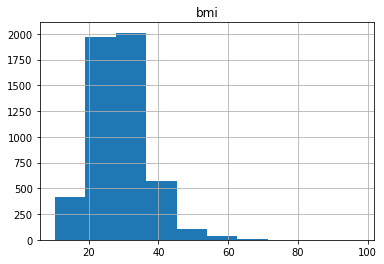

In [62]:
df.hist(column='bmi')

In [ ]:
the graph is a possitivily skewed here we can find out the selection criteria of mean,median,mode in this data 
positively skewed means we can fill it by applying mode in it

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mode()[0])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.var()

id                   4.478185e+08
age                  5.113318e+02
hypertension         8.797552e-02
heart_disease        5.110447e-02
avg_glucose_level    2.050601e+03
bmi                  5.926089e+01
stroke               4.636264e-02
dtype: float64

# one hot encoding

In [103]:
df_one_hot = pd.get_dummies(df,columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])
df_one_hot.head()                        

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.7,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [7]:
df_one_hot.shape

(5110, 23)

# feature selection

by using SelectKBest & chi2 algorithm whic is available in the sikitlearn package 
SelectKBest: in which we select the value the of k like k = 10 , k = 5 and so on it give us the top 12,5 feature
that is more corelated with our targeted variable 
chi2 : it is basically use to statistical anylsis like hypothese etc it is ordering the feature according to thier
feature itself 

In [149]:
x = df_one_hot.drop(['stroke'] , axis = 1)
y = df_one_hot['stroke']

In [151]:
feature_ranking = SelectKBest(score_func = chi2 , k = 22) # we take all to find more relavancy with target feature
order_of_feature = feature_ranking.fit(x,y)

In [152]:
df_score = pd.DataFrame(order_of_feature.scores_ , columns = ['score'])
df_colum = pd.DataFrame(x.columns) # take column from the independed variable

In [153]:
feature = pd.concat([df_colum,df_score ],axis = 1)
feature.columns = ['feature','score']
feature

,feature,score
0,id,2556.735918
1,age,3635.226911
2,hypertension,75.449498
3,heart_disease,87.987436
4,avg_glucose_level,1718.285446
5,bmi,15.340566
6,gender_Female,0.172411
7,gender_Male,0.248952
8,gender_Other,0.051224
9,ever_married_No,39.355836


In [12]:
#it give us the feature top 10 feature w.r.t score
feature.nlargest(7,'score')

,feature,score
1,age,3635.226911
0,id,2556.735918
4,avg_glucose_level,1718.285446
3,heart_disease,87.987436
2,hypertension,75.449498
9,ever_married_No,39.355836
15,work_type_children,31.111620


# feature importance

###feture importance
another method of selecting the feature
this technique give a score to each feature of a data ther higher the score the more relivancy with the feature 

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
etc_model = ExtraTreesClassifier()
etc_model.fit(x,y)

E:\new machine install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

in which we will match our respected top feature 

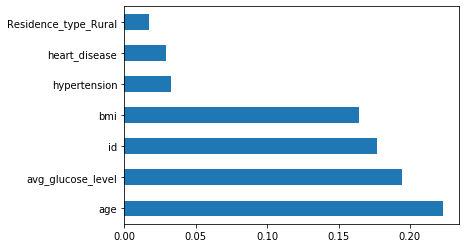

In [14]:
ranked_feature = pd.Series(etc_model.feature_importances_,index = x.columns)
ranked_feature.nlargest(7).plot(kind = 'barh')
plt.show()

here we can see that its almost same with a little bit chnges

# correlation
in which we can see that the higly correlted feature by using a graph to make it better understand 

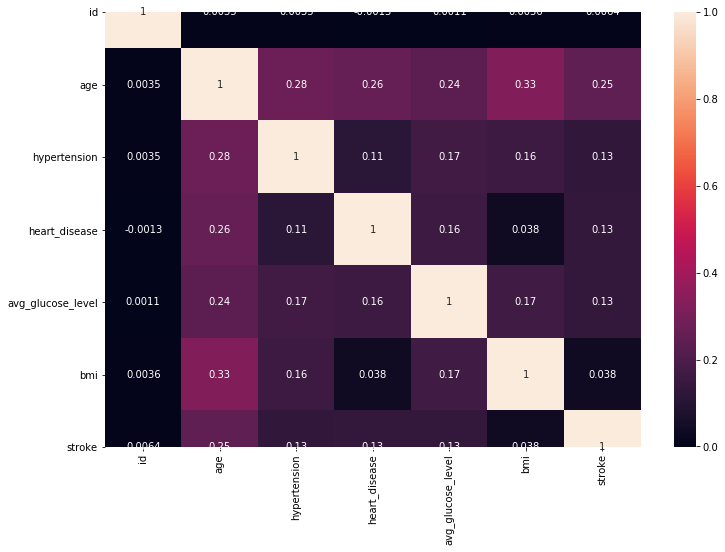

In [15]:
import seaborn as sns
corr = df.corr()
ranked_feature = corr.index # taking all the index value save in variable
plt.figure(figsize =(12,8))
sns.heatmap(df[ranked_feature].corr(),annot = True)
plt.show()

# #logistic regression

In [16]:
#traintestsplit
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=25, shuffle=True)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

E:\new machine install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
xt_pred = lr.predict(xtest)

In [20]:
# accuracy store 
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(ytest,xt_pred)
lr_accuracy

0.9510763209393346

# decisiontreeclassifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
dsc_model = DecisionTreeClassifier()

In [131]:
x1 =  df_one_hot.drop(['stroke'],axis = 1)
y1 = df_one_hot['stroke']

In [132]:
from sklearn.model_selection import train_test_split 
xtrain , xtest , ytrain , ytest = train_test_split(x1,y1, test_size = 0.30,random_state = 100)

In [133]:
dsc_model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [134]:
dsc_pred = dsc_model.predict(xtest)

In [135]:
from sklearn.metrics import accuracy_score
dsc_acuuracy = accuracy_score(ytest,dsc_pred)
dsc_acuuracy

0.903457273320287

In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(ytest,dsc_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1464
           1       0.16      0.28      0.20        69

    accuracy                           0.90      1533
   macro avg       0.56      0.60      0.58      1533
weighted avg       0.93      0.90      0.92      1533



# randomeforest

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
cl_rf = RandomForestClassifier()

In [143]:
x1 =  df_one_hot.drop(['stroke'],axis = 1)
y1 = df_one_hot['stroke']

In [144]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x1,y1, test_size = 0.30,random_state = 100)

In [145]:
cl_rf.fit(x_train,y_train)

E:\new machine install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [146]:
cl_pred = cl_rf.predict(x_test)

In [148]:
from sklearn.metrics import accuracy_score
cl_acc_score = accuracy_score(y_test ,cl_pred)
cl_acc_score

0.954337899543379

# visualization

In [21]:
df_male = df[(df['gender'] == 'Male') &  (df['work_type'] == 'Private')]
df_male

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.7,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5077,8203,Male,17.0,0,0,No,Private,Rural,106.56,21.0,Unknown,0
5084,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.9,smokes,0
5091,6369,Male,59.0,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,28.7,smokes,0


In [95]:
avg_level = df[df['avg_glucose_level'] > 100]
avg_level.avg_glucose_level.count()

1979

In [102]:
male  = df[(df['gender'] == 'Male') & (df['heart_disease'] == 1)]
male.heart_disease.count()

163

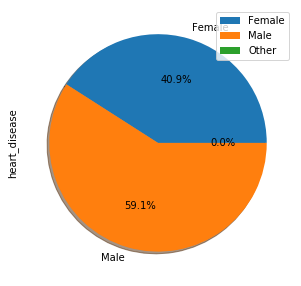

In [76]:
grou = df.groupby(['gender']).sum().plot(kind = 'pie',y = 'heart_disease',figsize=(10,5),autopct='%1.1f%%',shadow = True)
grou


this anylsis chart men have heart disease more than female

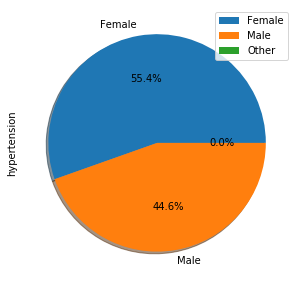

In [82]:
grou = df.groupby(['gender']).sum().plot(kind = 'pie',y = 'hypertension',figsize=(10,5),autopct='%1.1f%%',shadow = True)
grou

this anylsis chart shows that men have less hypertension than female

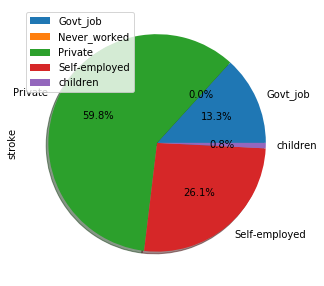

In [81]:
grou2 = df.groupby(['work_type']).sum().plot(kind = 'pie',y = 'stroke',figsize=(10,5),autopct='%1.1f%%',shadow = True)
grou2